# Research Project

Author: Martin Beneš

## Introduction
*TODO*

In [49]:
scale = 10 # 1:10M

*TODO*

In [4]:
# data libraries
import pandas as pd
# visualization
import geopandas
import matplotlib.pyplot as plt

## Loading the data

In [5]:
# czech data
import covid19czechia
cz_deaths = covid19czechia.covid_deaths(level = 2)
cz_deaths

,week,age_group,sex,region,deaths
0,12,90_94,M,CZ010,1
1,13,40_44,M,CZ080,1
2,13,45_49,F,CZ020,1
3,13,70_74,F,CZ010,1
4,13,70_74,M,CZ010,2
...,...,...,...,...,...
314,32,75_79,M,CZ071,1
315,32,85_89,F,CZ010,1
316,32,85_89,F,CZ080,1
317,32,90_94,M,CZ063,1


In [4]:
# poland data
import covid19poland
pl_deaths = covid19poland.covid_deaths()
pl_deaths

,week,age_group,sex,region,deaths
0,11,65_69,M,PL814,1
1,11,70_74,M,PL514,1
2,12,35_39,F,PL415,1
3,12,40_44,M,PL921,1
4,12,55_59,M,PL517,1
...,...,...,...,...,...
872,27,85_89,F,PL923,1
873,27,85_89,F,PL925,1
874,27,85_89,M,PL921,1
875,27,90_94,F,PL22C,1


In [3]:
# sweden data
import covid19sweden
se_deaths = covid19sweden.covid_deaths()
se_deaths

,week,region,deaths,confirmed,icu,confirmed_per100k
0,6,SE221,0,0,0,0
1,7,SE221,0,0,0,0
2,8,SE221,0,0,0,0
3,9,SE221,0,0,0,0
4,10,SE221,0,0,0,0
...,...,...,...,...,...,...
562,28,SE124,2,60,0,13
563,29,SE124,4,51,0,11
564,30,SE124,1,26,0,6
565,31,SE124,1,43,0,9


In [35]:
# population data
import eurostat_deaths
population = eurostat_deaths.populations()
population

,sex,age,geo\time,2019,2018,2017,2016,2015,2014
0,F,TOTAL,AL,1432833.0,1431715.0,1423050.0,1417141.0,1424597.0,1430827.0
1,F,TOTAL,AL0,1432833.0,1431715.0,1423050.0,1417141.0,1424597.0,1430827.0
2,F,TOTAL,AL01,404201.0,405598.0,405835.0,406682.0,410586.0,416084.0
3,F,TOTAL,AL011,57002.0,57895.0,59837.0,61749.0,63084.0,64941.0
4,F,TOTAL,AL012,143366.0,142648.0,139433.0,136589.0,135847.0,135390.0
...,...,...,...,...,...,...,...,...,...
131875,T,0_4,UKN12,8461.0,8594.0,8720.0,8844.0,8831.0,8800.0
131876,T,0_4,UKN13,8765.0,8881.0,9083.0,9248.0,9351.0,9538.0
131877,T,0_4,UKN14,8934.0,8911.0,8946.0,9009.0,9060.0,9053.0
131878,T,0_4,UKN15,7950.0,7999.0,8048.0,8050.0,8052.0,8073.0


In [36]:
population = population[(population.age == "TOTAL") & (population.sex == "T")][['geo\\time','2019']]
population.columns = ['region','population']
population

,region,population
87920,AL,2862427.0
87921,AL0,2862427.0
87922,AL01,813758.0
87923,AL011,118948.0
87924,AL012,290126.0
...,...,...
89949,UKN12,144367.0
89950,UKN13,142565.0
89951,UKN14,144771.0
89952,UKN15,138948.0


In [24]:
import covid19dh

data = covid19dh.covid19(["Poland","Sweden","Czech Republic"], level = 1, verbose = False) # load data
restriction_cols = ['school_closing','workplace_closing','cancel_events','gatherings_restrictions','transport_closing','stay_home_restrictions','internal_movement_restrictions','testing_policy','contact_tracing']
restrictions = data[['date','iso_alpha_3',*restriction_cols]]
restrictions


,date,iso_alpha_3,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,testing_policy,contact_tracing
0,2020-01-04,CZE,0,0,0,0,0,0,0,0,0
1,2020-01-05,CZE,0,0,0,0,0,0,0,0,0
2,2020-01-06,CZE,0,0,0,0,0,0,0,0,0
3,2020-01-07,CZE,0,0,0,0,0,0,0,0,0
4,2020-01-08,CZE,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
667,2020-08-10,SWE,0,1,1,3,0,0,0,2,1
668,2020-08-11,SWE,0,1,1,3,0,0,0,2,1
669,2020-08-12,SWE,0,1,1,3,0,0,0,2,1
670,2020-08-13,SWE,0,1,1,3,0,0,0,2,1


Default data, geometry of borders and cities, are loaded.

In [50]:
# load data
borders = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
iso2_to_iso3 = {
    'AF':'AFG','AX':'ALA','AL':'ALB','DZ':'DZA','AS':'ASM','AD':'AND','AO':'AGO','AI':'AIA','AQ':'ATA','AG':'ATG','AR':'ARG','AM':'ARM',
    'AW':'ABW','AU':'AUS','AT':'AUT','AZ':'AZE','BS':'BHS','BH':'BHR','BD':'BGD','BB':'BRB','BY':'BLR','BE':'BEL','BZ':'BLZ','BJ':'BEN',
    'BM':'BMU','BT':'BTN','BO':'BOL','BA':'BIH','BW':'BWA','BV':'BVT','BR':'BRA','IO':'IOT','BN':'BRN','BG':'BGR','BF':'BFA','BI':'BDI',
    'KH':'KHM','CM':'CMR','CA':'CAN','CV':'CPV','KY':'CYM','CF':'CAF','TD':'TCD','CL':'CHL','CN':'CHN','CX':'CXR','CC':'CCK','CO':'COL',
    'KM':'COM','CG':'COG','CD':'COD','CK':'COK','CR':'CRI','CI':'CIV','HR':'HRV','CU':'CUB','CY':'CYP','CZ':'CZE','DK':'DNK','DJ':'DJI',
    'DM':'DMA','DO':'DOM','EC':'ECU','EG':'EGY','SV':'SLV','GQ':'GNQ','ER':'ERI','EE':'EST','ET':'ETH','FK':'FLK','FO':'FRO','FJ':'FJI',
    'FI':'FIN','FR':'FRA','GF':'GUF','PF':'PYF','TF':'ATF','GA':'GAB','GM':'GMB','GE':'GEO','DE':'DEU','GH':'GHA','GI':'GIB','GR':'GRC',
    'GL':'GRL','GD':'GRD','GP':'GLP','GU':'GUM','GT':'GTM','GG':'GGY','GN':'GIN','GW':'GNB','GY':'GUY','HT':'HTI','HM':'HMD','VA':'VAT',
    'HN':'HND','HK':'HKG','HU':'HUN','IS':'ISL','IN':'IND','ID':'IDN','IR':'IRN','IQ':'IRQ','IE':'IRL','IM':'IMN','IL':'ISR','IT':'ITA',
    'JM':'JAM','JP':'JPN','JE':'JEY','JO':'JOR','KZ':'KAZ','KE':'KEN','KI':'KIR','KP':'PRK','KR':'KOR','KW':'KWT','KG':'KGZ','LA':'LAO',
    'LV':'LVA','LB':'LBN','LS':'LSO','LR':'LBR','LY':'LBY','LI':'LIE','LT':'LTU','LU':'LUX','MO':'MAC','MK':'MKD','MG':'MDG','MW':'MWI',
    'MY':'MYS','MV':'MDV','ML':'MLI','MT':'MLT','MH':'MHL','MQ':'MTQ','MR':'MRT','MU':'MUS','YT':'MYT','MX':'MEX','FM':'FSM','MD':'MDA',
    'MC':'MCO','MN':'MNG','ME':'MNE','MS':'MSR','MA':'MAR','MZ':'MOZ','MM':'MMR','NA':'NAM','NR':'NRU','NP':'NPL','NL':'NLD','AN':'ANT',
    'NC':'NCL','NZ':'NZL','NI':'NIC','NE':'NER','NG':'NGA','NU':'NIU','NF':'NFK','MP':'MNP','NO':'NOR','OM':'OMN','PK':'PAK','PW':'PLW',
    'PS':'PSE','PA':'PAN','PG':'PNG','PY':'PRY','PE':'PER','PH':'PHL','PN':'PCN','PL':'POL','PT':'PRT','PR':'PRI','QA':'QAT','RE':'REU',
    'RO':'ROU','RU':'RUS','RW':'RWA','BL':'BLM','SH':'SHN','KN':'KNA','LC':'LCA','MF':'MAF','PM':'SPM','VC':'VCT','WS':'WSM','SM':'SMR',
    'ST':'STP','SA':'SAU','SN':'SEN','RS':'SRB','SC':'SYC','SL':'SLE','SG':'SGP','SK':'SVK','SI':'SVN','SB':'SLB','SO':'SOM','ZA':'ZAF',
    'GS':'SGS','ES':'ESP','LK':'LKA','SD':'SDN','SR':'SUR','SJ':'SJM','SZ':'SWZ','SE':'SWE','CH':'CHE','SY':'SYR','TW':'TWN','TJ':'TJK',
    'TZ':'TZA','TH':'THA','TL':'TLS','TG':'TGO','TK':'TKL','TO':'TON','TT':'TTO','TN':'TUN','TR':'TUR','TM':'TKM','TC':'TCA','TV':'TUV',
    'UG':'UGA','UA':'UKR','AE':'ARE','GB':'GBR','US':'USA','UM':'UMI','UY':'URY','UZ':'UZB','VU':'VUT','VE':'VEN','VN':'VNM','VG':'VGB',
    'VI':'VIR','WF':'WLF','EH':'ESH','YE':'YEM','ZM':'ZMB','ZW':'ZWE'}
iso3_to_iso2 = {v: k for k,v in iso2_to_iso3.items()}
borders['iso_a2'] = borders.iso_a3.apply(lambda iso: iso3_to_iso2.get(iso,iso))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

A NUTS region geometry is loaded. The files has been acquired from https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts.

In [51]:
# load NUTS geojsons
import os, pathlib
geojson_files = [f for f in os.listdir('geojson') if f.split('.')[-1] == 'geojson']
geojsons = {f: geopandas.read_file(pathlib.Path('geojson') / f) for f in geojson_files}

In [52]:
# parse relevant files
boundaries,centers,shapes = {},{},{}
for lvl in range(4): # 0 - 3
    bn_key = f'NUTS_BN_{str(scale).zfill(2)}M_2016_4326_LEVL_{lvl}.geojson'
    lb_key = f'NUTS_LB_2016_4326_LEVL_{lvl}.geojson'
    rg_key = f'NUTS_RG_{str(scale).zfill(2)}M_2016_4326_LEVL_{lvl}.geojson'
    boundaries[lvl], centers[lvl], shapes[lvl] = geojsons[bn_key], geojsons[lb_key], geojsons[rg_key]
    shapes[lvl]["region"] = shapes[lvl].NUTS_ID 

In [53]:
borders = borders[~borders.iso_a2.isin(shapes[0].CNTR_CODE)]

Ammend data.

In [45]:
# group
cz_deaths = cz_deaths.groupby(["week","region"])["deaths"].sum().reset_index()
pl_deaths = pl_deaths.groupby(["week","region"])["deaths"].sum().reset_index()
se_deaths = se_deaths.groupby(["week","region"])["deaths"].sum().reset_index()
# add populations
cz_deaths = cz_deaths.merge(population, on="region")
pl_deaths = pl_deaths.merge(population, on="region")
se_deaths = se_deaths.merge(population, on="region")
# deaths per 100k
cz_deaths['deaths_norm'] = cz_deaths.deaths / cz_deaths.population * 1e3
pl_deaths['deaths_norm'] = pl_deaths.deaths / pl_deaths.population * 1e3
se_deaths['deaths_norm'] = se_deaths.deaths / se_deaths.population * 1e3
cz_deaths

,week,region,deaths,population,deaths_norm
0,12,CZ010,1,1308632.0,0.000764
1,13,CZ010,12,1308632.0,0.009170
2,14,CZ010,24,1308632.0,0.018340
3,15,CZ010,28,1308632.0,0.021396
4,16,CZ010,10,1308632.0,0.007642
...,...,...,...,...,...
118,15,CZ072,1,582921.0,0.001715
119,17,CZ072,1,582921.0,0.001715
120,20,CZ072,1,582921.0,0.001715
121,23,CZ072,1,582921.0,0.001715


In [58]:
week = 21
# ammend cz
cz_deaths_week = shapes[3].merge(cz_deaths[cz_deaths.week == week], on = "region")
# ammend pl
pl_deaths_week = shapes[3].merge(pl_deaths[pl_deaths.week == week], on = "region")
# ammend se
se_deaths_week = shapes[3].merge(se_deaths[se_deaths.week == week], on = "region")

# join
deaths_week = cz_deaths_week.append(pl_deaths_week)
#deaths_week = deaths_week.append(se_deaths_week)

Plot regions.

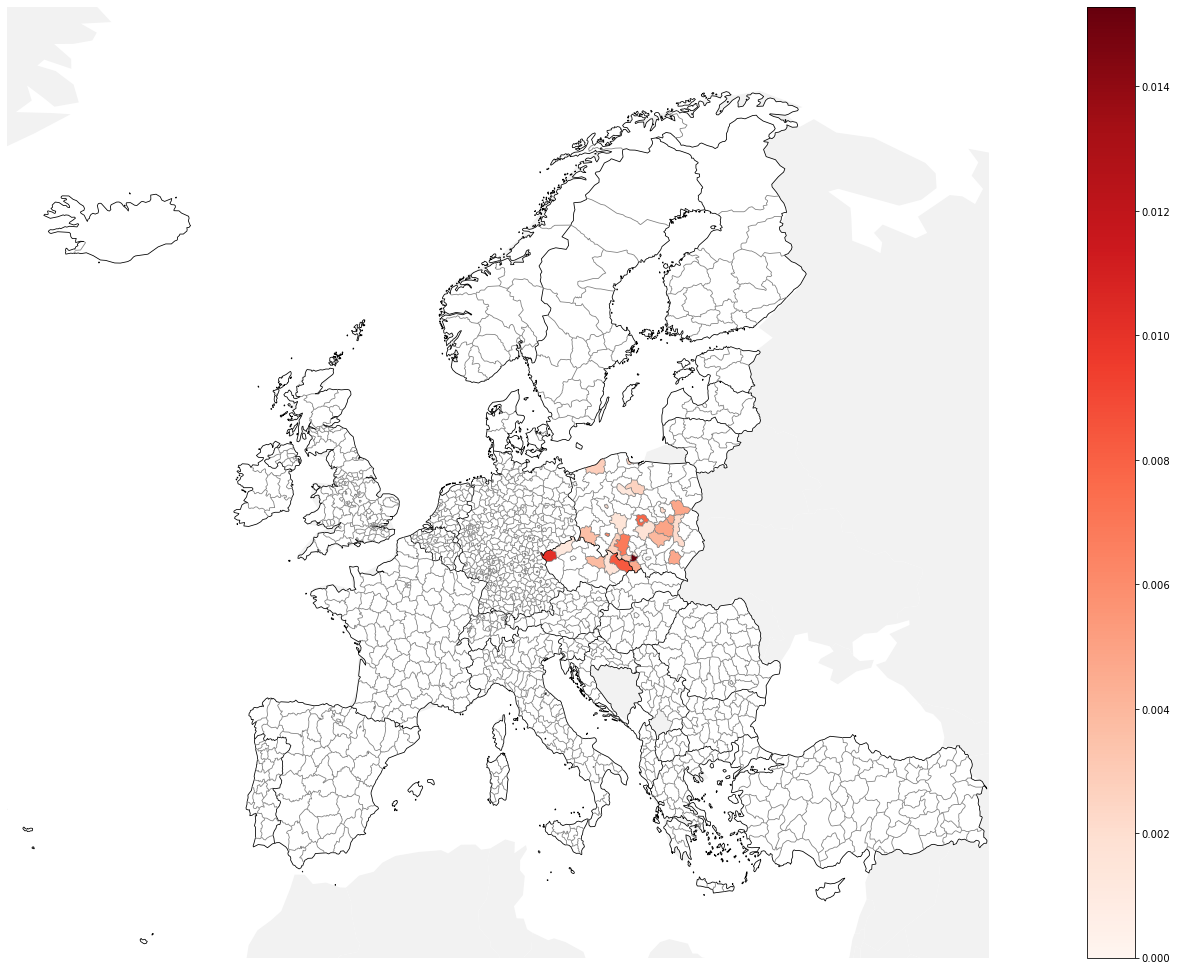

In [59]:
import math
plot_size = 35 # cm
w = 1 / math.cos(math.radians(60.0)) # aspect ratio

# ===== plot map =====
# prepare plot
fig, ax = plt.subplots(figsize=(plot_size, plot_size / w), facecolor=(1,1,1))
ax.axis('off') # remove axis
ax.set_xlim(-27,45); ax.set_ylim(32,75) # crop Europe

#ax.set_aspect(w)

# add boundaries
borders.plot(ax = ax, color = (.95,.95,.95), linewidth = .5)
boundaries[0].plot(ax = ax, color = "k", linewidth = .8)
boundaries[1].plot(ax = ax, color = "grey", linewidth = .8)
boundaries[2].plot(ax = ax, color = "grey", linewidth = .8)
boundaries[3].plot(ax = ax, color = "grey", linewidth = .8)

# add shapes
shapes[0].plot(ax = ax, markersize = 20, color = 'white')

# plot data
deaths_week.plot(ax = ax, column = 'deaths_norm', cmap='Reds', vmin = 0, legend = True)
# ...

plt.show()
# ====================

In [ ]:
#df = pd.DataFrame(
#    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
#     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
#     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
#     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
#gdf = geopandas.GeoDataFrame(
#    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))